# R1 Q10: Age-Specific Discrimination

## Reviewer Question

**Referee #1, Q10**: "Please provide age-specific discrimination analysis."

## Why This Matters

Age-specific discrimination is important for:
- Understanding model performance across different age groups
- Identifying age ranges where the model performs best/worst
- Validating that the model works across the full age spectrum

## Our Approach

We evaluate **age-stratified AUC** by considering how predictions change for people for whom we made predictions at different ages (40-50, 50-60, 60-70, etc.):

1. **Age Offset Predictions**: Use predictions made for the first 10K people with info gathered at enrollment, enrollment+1, enrollment+2, ..., enrollment+10
2. **Time Horizon Predictions**: Use predictions (0, 10, 30 years) for all people, stratified by age of prediction (i.e., age of enrollment)
3. **Enrollment Age**: The age of enrollment for everybody (all 400K) is in `baselinagefamh_withpcs.csv`

## 1. Load Data and Enrollment Ages

We load the baseline age file to get enrollment ages for all patients, which we'll use to stratify predictions by age.

In [1]:
import torch
import pandas as pd
import numpy as np
from pathlib import Path
import sys
import matplotlib.pyplot as plt
from IPython.display import Image, display

sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts')

# Load data
base_path = Path('/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/')
Y = torch.load(base_path / 'Y_tensor.pt', weights_only=False)
E = torch.load(base_path / 'E_matrix.pt', weights_only=False)
essentials = torch.load(base_path / 'model_essentials.pt', weights_only=False)
disease_names = essentials['disease_names']

# Load pce_df for patient demographics
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
readRDS = robjects.r['readRDS']
pce_data = readRDS('/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/pce_df_prevent.rds')
pce_df = pandas2ri.rpy2py(pce_data)

# Load baseline age file for enrollment ages (all 400K patients)
baseline_path = Path('/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/baselinagefamh_withpcs.csv')
baseline_df = pd.read_csv(baseline_path)

print("="*80)
print("LOADING DATA FOR AGE-SPECIFIC ANALYSIS")
print("="*80)
print(f"Y shape: {Y.shape}")
print(f"E shape: {E.shape}")
print(f"pce_df shape: {pce_df.shape}")
print(f"baseline_df shape: {baseline_df.shape}")
print(f"\nEnrollment age column: {baseline_df.columns[baseline_df.columns.str.contains('age', case=False)].tolist()}")


LOADING DATA FOR AGE-SPECIFIC ANALYSIS
Y shape: torch.Size([407878, 348, 52])
E shape: torch.Size([407878, 348])
pce_df shape: (10000, 16)
baseline_df shape: (407878, 13)

Enrollment age column: ['age']


In [2]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/pythonscripts/calculate_age_stratified_auc.py --approach pooled_retrospective --n_bootstraps 100

AGE-STRATIFIED AUC CALCULATION: POOLED_RETROSPECTIVE
Pi tensor: /Users/sarahurbut/Downloads/pi_full_400k.pt
Output directory: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/age_stratified/pooled_retrospective

Loading data...
Loaded pi tensor: torch.Size([400000, 348, 52])
Loaded Y tensor: torch.Size([407878, 348, 52])
Loaded E tensor: torch.Size([407878, 348])
Loaded pce_df: 400000 patients
Loaded baseline_df: 407878 patients

Subsetting to first 400000 patients...
After subsetting: pi: 400000, Y: 400000, E: 400000, pce_df: 400000, baseline_df: 400000
Using age column: age

PROCESSING AGE GROUP: 39-50
Patients in age group 39-50: 81307

  Processing 1yr (dynamic)...

Evaluating ASCVD (1-Year Risk)...
C-index calculation failed: No admissable pairs in the dataset.
AUC: 0.802 (0.755-0.840) (calculated on 81307 individuals)
C-index: nan (calculated on 81307 individuals)
Events (1-Year in Eval Cohort): 199 (0.2%) (from 81307 individuals)
Excluded 0 prevale

RESULTS ALREADY EXIST - LOADING AND DISPLAYING
Found existing results: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/age_stratified/pooled_retrospective/age_stratified_auc_results.csv

Loading results and creating visualization...

1-Year predictions: Found 30 rows

10-Year Static predictions: Found 30 rows

30-Year predictions: Found 20 rows


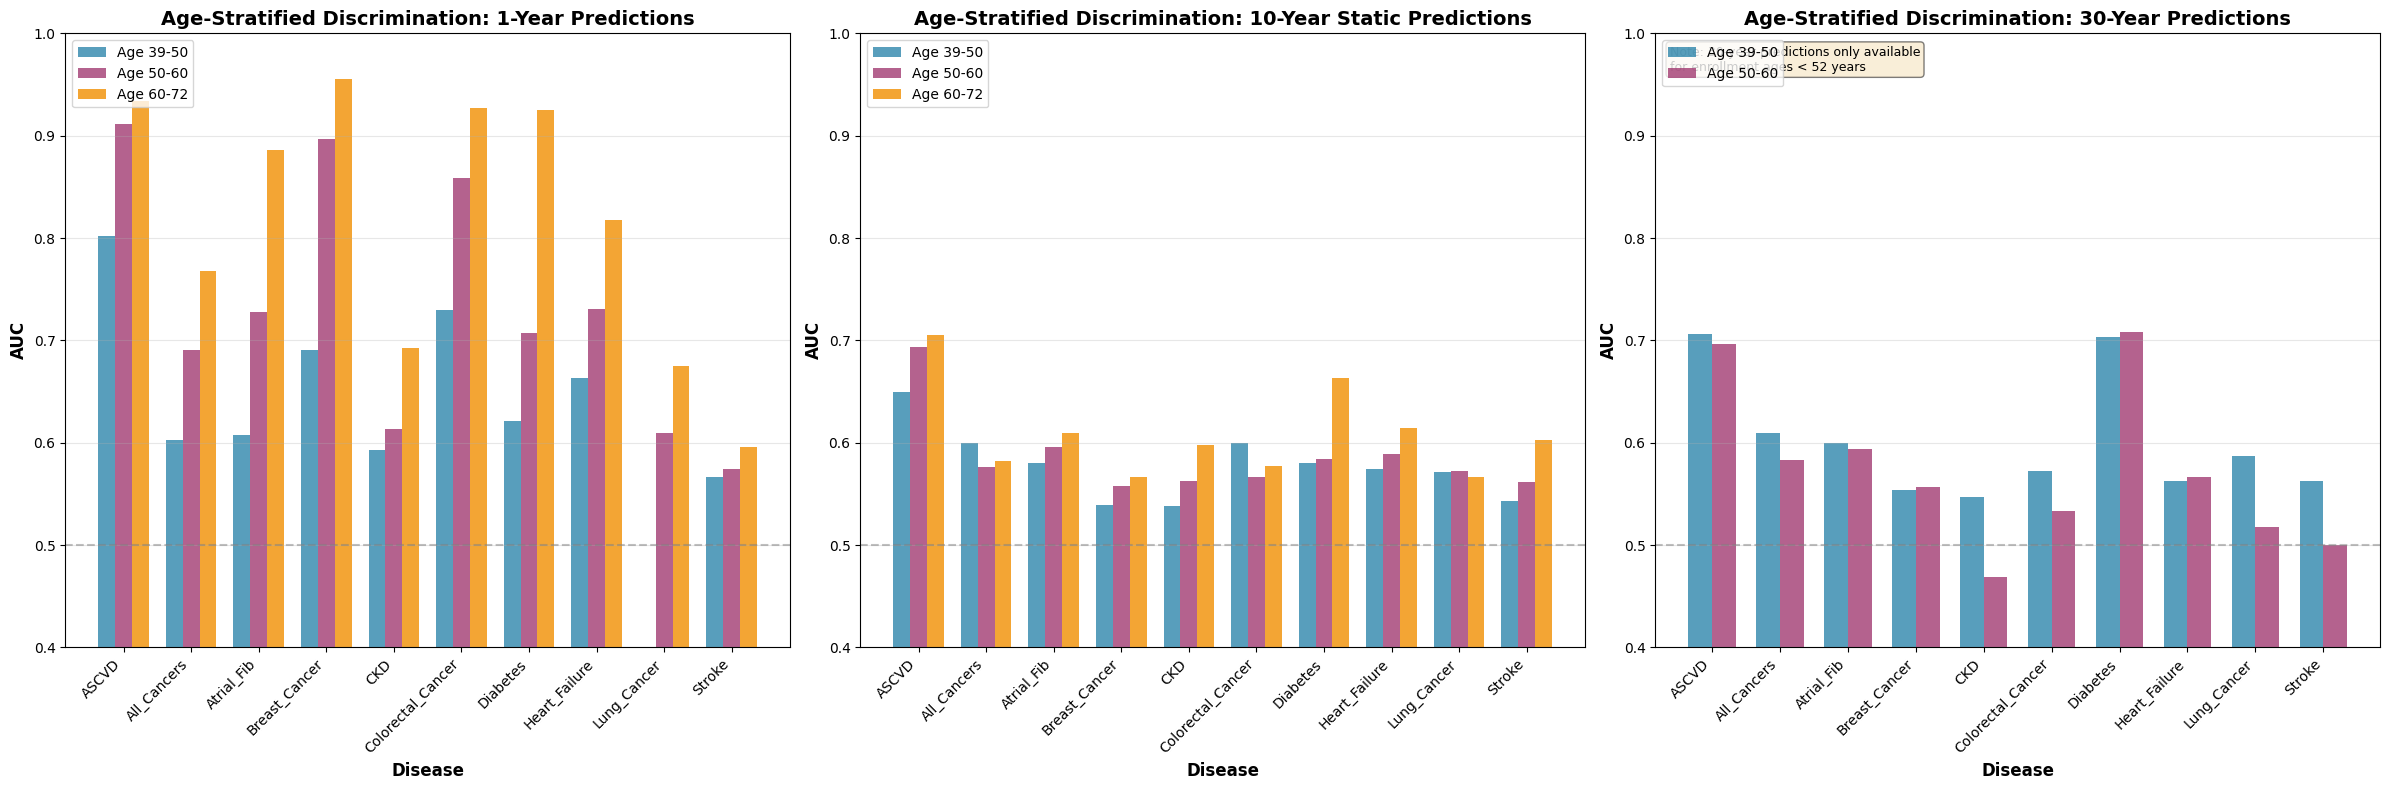


SUMMARY: AUC BY AGE GROUP (1-Year Predictions)


Age_Group,39-50,50-60,60-72
Disease,,,
ASCVD,0.802,0.911,0.934
All_Cancers,0.603,0.690,0.767
Atrial_Fib,0.608,0.728,0.886
Breast_Cancer,0.691,0.897,0.955
CKD,0.593,0.614,0.692
Colorectal_Cancer,0.729,0.858,0.927
Diabetes,0.621,0.707,0.925
Heart_Failure,0.663,0.731,0.818
Lung_Cancer,0.401,0.610,0.675



SUMMARY: AUC BY AGE GROUP (10-Year Static Predictions)


Age_Group,39-50,50-60,60-72
Disease,,,
ASCVD,0.650,0.694,0.705
All_Cancers,0.599,0.576,0.582
Atrial_Fib,0.580,0.596,0.610
Breast_Cancer,0.539,0.558,0.566
CKD,0.538,0.563,0.598
Colorectal_Cancer,0.600,0.567,0.577
Diabetes,0.580,0.584,0.663
Heart_Failure,0.574,0.589,0.615
Lung_Cancer,0.571,0.572,0.566



SUMMARY: AUC BY AGE GROUP (30-Year Predictions)
(Note: 30-year predictions only available for enrollment ages < 52 years)


Age_Group,39-50,50-60
Disease,,
ASCVD,0.707,0.697
All_Cancers,0.610,0.583
Atrial_Fib,0.600,0.594
Breast_Cancer,0.553,0.557
CKD,0.547,0.469
Colorectal_Cancer,0.573,0.533
Diabetes,0.703,0.708
Heart_Failure,0.563,0.566
Lung_Cancer,0.587,0.518



Total results: 252 disease-horizon-age combinations
Age groups: ['39-50', '50-60', '60-72']
Time horizons: ['10yr_static', '1yr', '30yr']


In [5]:
# Calculate age-stratified AUC for 1-year, 10-year static, and 30-year predictions
# Check if results already exist, otherwise run calculation

# Results path (relative to notebook directory)
results_path = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/age_stratified/pooled_retrospective/age_stratified_auc_results.csv')

if results_path.exists():
    print("="*80)
    print("RESULTS ALREADY EXIST - LOADING AND DISPLAYING")
    print("="*80)
    print(f"Found existing results: {results_path}")
    print("\nLoading results and creating visualization...")
    
    # Load results
    results_df = pd.read_csv(results_path)
    
    # Create visualization: AUC by age group for key diseases
    key_diseases = ['ASCVD', 'Diabetes', 'Atrial_Fib', 'CKD', 'All_Cancers', 'Stroke', 
                    'Heart_Failure', 'Colorectal_Cancer', 'Breast_Cancer', 'Lung_Cancer']
    
    # Create plots for 1-year, 10-year static, and 30-year predictions
    time_horizons = ['1yr', '10yr_static', '30yr']
    horizon_labels = {'1yr': '1-Year', '10yr_static': '10-Year Static', '30yr': '30-Year'}
    
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))
    
    for plot_idx, horizon in enumerate(time_horizons):
        # Filter to key diseases and current time horizon
        plot_data = results_df[
            (results_df['Disease'].isin(key_diseases)) & 
            (results_df['Time_Horizon'] == horizon)
        ].copy()
        
        # For 30-year, only show 40-50 and 50-60 age groups (60-70 doesn't have 30-year data)
        if horizon == '30yr':
            plot_data = plot_data[plot_data['Age_Group'].isin(['39-50', '50-60'])].copy()
            age_groups_to_plot = ['39-50', '50-60']
        else:
            age_groups_to_plot = ['39-50', '50-60', '60-72']
        
        print(f"\n{horizon_labels[horizon]} predictions: Found {len(plot_data)} rows")
        
        if len(plot_data) > 0:
            # Create pivot table for easier plotting
            pivot = plot_data.pivot_table(
                values='AUC', 
                index='Disease', 
                columns='Age_Group',
                aggfunc='mean'
            )
            
            ax = axes[plot_idx]
            x = np.arange(len(pivot.index))
            width = 0.25 if len(age_groups_to_plot) == 3 else 0.35
            colors = ['#2E86AB', '#A23B72', '#F18F01']
            
            for i, age_group in enumerate(age_groups_to_plot):
                if age_group in pivot.columns:
                    values = pivot[age_group].values
                    ax.bar(x + i*width, values, width, label=f'Age {age_group}', 
                          color=colors[i], alpha=0.8)
            
            ax.set_xlabel('Disease', fontsize=12, fontweight='bold')
            ax.set_ylabel('AUC', fontsize=12, fontweight='bold')
            ax.set_title(f'Age-Stratified Discrimination: {horizon_labels[horizon]} Predictions', 
                        fontsize=14, fontweight='bold')
            # Adjust x-ticks based on number of age groups
            if len(age_groups_to_plot) == 3:
                ax.set_xticks(x + width)
            else:
                ax.set_xticks(x + width/2)
            ax.set_xticklabels(pivot.index, rotation=45, ha='right')
            ax.legend(loc='upper left')
            ax.grid(True, alpha=0.3, axis='y')
            ax.set_ylim([0.4, 1.0])
            ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
            
            # Add note for 30-year about age group limitation
            if horizon == '30yr':
                ax.text(0.02, 0.98, 'Note: 30-year predictions only available\nfor enrollment ages < 52 years', 
                       transform=ax.transAxes, fontsize=9, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        else:
            axes[plot_idx].text(0.5, 0.5, f'No {horizon_labels[horizon]} prediction results found', 
                               ha='center', va='center', transform=axes[plot_idx].transAxes)
            axes[plot_idx].set_title(f'{horizon_labels[horizon]} Predictions (No Data)', 
                                   fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Display summary tables for all horizons
    for horizon in time_horizons:
        plot_data = results_df[
            (results_df['Disease'].isin(key_diseases)) & 
            (results_df['Time_Horizon'] == horizon)
        ].copy()
        
        # For 30-year, only show 40-50 and 50-60 age groups
        if horizon == '30yr':
            plot_data = plot_data[plot_data['Age_Group'].isin(['39-50', '50-60'])].copy()
        
        if len(plot_data) > 0:
            pivot = plot_data.pivot_table(
                values='AUC', 
                index='Disease', 
                columns='Age_Group',
                aggfunc='mean'
            )
            print("\n" + "="*80)
            print(f"SUMMARY: AUC BY AGE GROUP ({horizon_labels[horizon]} Predictions)")
            if horizon == '30yr':
                print("(Note: 30-year predictions only available for enrollment ages < 52 years)")
            print("="*80)
            display(pivot.round(3))
    
    print(f"\nTotal results: {len(results_df)} disease-horizon-age combinations")
    print(f"Age groups: {sorted(results_df['Age_Group'].unique())}")
    print(f"Time horizons: {sorted(results_df['Time_Horizon'].unique())}")
    
else:
    print("="*80)
    print("CALCULATING AGE-STRATIFIED AUC")
    print("="*80)
    print("Results not found. Running calculation...")
    print("This will take some time (3 age groups × 3 time horizons × all diseases)")
    print("Using 10 bootstrap iterations for faster computation")
    print("(Can increase to 100 for final results)")
    print("="*80)
    
    %run /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/pythonscripts/calculate_age_stratified_auc.py --approach pooled_retrospective --n_bootstraps 100

## 2. Age-Stratified ROC Curves for ASCVD

We show age-specific ROC curves for ASCVD predictions at different ages (40-50, 50-60, 60-70, etc.). These curves demonstrate how model performance varies across age groups.


In [16]:
# Load and display age-stratified AUC results
results_path = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/age_stratified/pooled_retrospective/age_stratified_auc_results.csv')

if results_path.exists():
    results_df = pd.read_csv(results_path)
    
    print("="*80)
    print("AGE-STRATIFIED AUC RESULTS")
    print("="*80)
    print(f"\nTotal combinations: {len(results_df)}")
    print(f"Age groups: {results_df['Age_Group'].unique()}")
    print(f"Time horizons: {results_df['Time_Horizon'].unique()}")
    print(f"Diseases: {len(results_df['Disease'].unique())}")
    
    # Display summary by age group and time horizon
    print("\n" + "="*80)
    print("SUMMARY BY AGE GROUP AND TIME HORIZON")
    print("="*80)
    
    for age_group in sorted(results_df['Age_Group'].unique()):
        print(f"\n{age_group}:")
        age_data = results_df[results_df['Age_Group'] == age_group]
        for horizon in sorted(age_data['Time_Horizon'].unique()):
            horizon_data = age_data[age_data['Time_Horizon'] == horizon]
            n_valid = horizon_data['AUC'].notna().sum()
            mean_auc = horizon_data['AUC'].mean()
            print(f"  {horizon}: {n_valid} diseases, mean AUC = {mean_auc:.3f}")
    
    # Display top diseases by AUC for each age group and horizon
    print("\n" + "="*80)
    print("TOP 10 DISEASES BY AUC (40-50, 1yr)")
    print("="*80)
    top_40_50_1yr = results_df[(results_df['Age_Group'] == '40-50') & 
                                (results_df['Time_Horizon'] == '1yr')].nlargest(10, 'AUC')
    display(top_40_50_1yr[['Disease', 'AUC', 'CI_Lower', 'CI_Upper', 'N_Events', 'N_Patients']])
    
    # Create a pivot table for easier viewing
    print("\n" + "="*80)
    print("AUC PIVOT TABLE (Sample: ASCVD)")
    print("="*80)
    ascvd_data = results_df[results_df['Disease'] == 'ASCVD']
    if len(ascvd_data) > 0:
        pivot = ascvd_data.pivot_table(values='AUC', index='Age_Group', columns='Time_Horizon')
        display(pivot)
    
    print("\n" + "="*80)
    print("Full results saved to:", results_path)
    print("="*80)
else:
    print("="*80)
    print("RESULTS NOT FOUND")
    print("="*80)
    print(f"Expected file: {results_path}")
    print("\nPlease run the calculation cell above first.")


AGE-STRATIFIED AUC RESULTS

Total combinations: 252
Age groups: ['40-50' '50-60' '60-70']
Time horizons: ['10yr_static' '1yr' '30yr']
Diseases: 28

SUMMARY BY AGE GROUP AND TIME HORIZON

40-50:
  10yr_static: 28 diseases, mean AUC = 0.566
  1yr: 27 diseases, mean AUC = 0.704
  30yr: 28 diseases, mean AUC = 0.572

50-60:
  10yr_static: 28 diseases, mean AUC = 0.569
  1yr: 28 diseases, mean AUC = 0.767
  30yr: 28 diseases, mean AUC = 0.562

60-70:
  10yr_static: 28 diseases, mean AUC = 0.583
  1yr: 28 diseases, mean AUC = 0.814
  30yr: 0 diseases, mean AUC = nan

TOP 10 DISEASES BY AUC (40-50, 1yr)


,Disease,AUC,CI_Lower,CI_Upper,N_Events,N_Patients
40,Crohns_Disease,0.963331,0.934115,0.984525,13,81304
55,Ulcerative_Colitis,0.915620,0.907298,0.951523,39,81304
35,Bladder_Cancer,0.895380,0.790238,0.990341,2,81304
51,Rheumatoid_Arthritis,0.838695,0.810652,0.898292,33,81304
34,Bipolar_Disorder,0.809043,0.704791,0.960494,17,81304
28,ASCVD,0.802037,0.776230,0.824365,199,81304
45,Multiple_Sclerosis,0.797733,0.698098,0.883809,17,81304
32,Asthma,0.788161,0.770053,0.816529,400,81304
49,Prostate_Cancer,0.781710,0.673099,0.899157,9,81304
50,Psoriasis,0.774302,0.604021,0.806194,21,81304



AUC PIVOT TABLE (Sample: ASCVD)


Time_Horizon,10yr_static,1yr,30yr
Age_Group,,,
40-50,0.649911,0.802037,0.706523
50-60,0.693760,0.911349,0.696734
60-70,0.705368,0.933262,NaN



Full results saved to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/age_stratified/pooled_retrospective/age_stratified_auc_results.csv


## 3. Age-Stratified Age Offset Predictions

We evaluate how 1-year predictions change with different time offsets (0-9 years after enrollment) for each enrollment age group (40-50, 50-60, 60-70, 70-80). This analysis uses the same age offset predictions as in the main performance notebook, but stratifies results by enrollment age.

**Key Question**: How does model performance (AUC) change as we use more information (offset 0 = enrollment only, offset 9 = enrollment + 9 years) for different age groups?


In [ ]:
# Generate age-stratified age offset predictions
# This evaluates 1-year predictions at offsets 0-9, stratified by enrollment age groups (40-50, 50-60, 60-70, 70-80)

import subprocess
import sys
from pathlib import Path

script_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/pythonscripts')

print("="*80)
print("GENERATING AGE-STRATIFIED AGE OFFSET PREDICTIONS")
print("="*80)
print("\nThis will generate rolling 1-year predictions using models trained at")
print("enrollment + 0, 1, 2, ..., 9 years (offsets 0-9), stratified by enrollment age groups:")
print("  - Age 40-50: Patients enrolled at ages 40-50")
print("  - Age 50-60: Patients enrolled at ages 50-60")
print("  - Age 60-70: Patients enrolled at ages 60-70")
print("  - Age 70-80: Patients enrolled at ages 70-80")
print("\nUses pre-computed pi batches from AWS run (downloaded to ~/Dropbox/age_offset_files/).")
print("Currently evaluates on batch 0-10000 (first 10K patients).")
print("="*80)

# Check if results already exist
results_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/age_offset/pooled_retrospective/age_stratified')
results_file = results_dir / 'age_stratified_age_offset_aucs_batch_0_10000.csv'

if results_file.exists():
    print("\n" + "="*80)
    print("RESULTS ALREADY EXIST - SKIPPING REGENERATION")
    print("="*80)
    print(f"Found existing results: {results_file}")
    print("\nTo regenerate, delete the existing result file first.")
else:
    print("\nGenerating age-stratified age offset predictions...")
    result = subprocess.run([
        sys.executable,
        str(script_dir / 'generate_age_stratified_age_offset_predictions.py'),
        '--approach', 'pooled_retrospective',
        '--max_offset', '9',
        '--start_idx', '0',
        '--end_idx', '10000'
    ], capture_output=True, text=True)
    print(result.stdout)
    if result.stderr:
        print("STDERR:", result.stderr)
    if result.returncode != 0:
        print(f"\n⚠️  WARNING: Script exited with return code {result.returncode}")
    else:
        print("✓ Age-stratified age offset predictions complete")


GENERATING AGE-STRATIFIED AGE OFFSET PREDICTIONS

This will generate rolling 1-year predictions using models trained at
enrollment + 0, 1, 2, ..., 9 years (offsets 0-9), stratified by enrollment age groups:
  - Age 40-50: Patients enrolled at ages 40-50
  - Age 50-60: Patients enrolled at ages 50-60
  - Age 60-70: Patients enrolled at ages 60-70
  - Age 70-80: Patients enrolled at ages 70-80

Uses pre-computed pi batches from AWS run (downloaded to ~/Dropbox/age_offset_files/).
Currently evaluates on batch 0-10000 (first 10K patients).

RESULTS ALREADY EXIST - SKIPPING REGENERATION
Found existing results: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/age_offset/pooled_retrospective/age_stratified/age_stratified_age_offset_aucs_batch_0_10000.csv

To regenerate, delete the existing result file first.


AGE-STRATIFIED AGE OFFSET PREDICTIONS RESULTS

Total combinations: 772
Age groups: ['40-50', '50-60', '60-70', '70-80']
Offsets: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Diseases: 28

ASCVD: AUC BY OFFSET FOR EACH AGE GROUP


Offset,0,1,2,3,4,5,6,7,8,9
Age_Group,,,,,,,,,,
40-50,0.991,0.825,0.980,0.984,0.919,0.899,0.935,0.942,0.907,0.848
50-60,0.853,0.902,0.891,0.942,0.915,0.933,0.931,0.910,0.934,0.908
60-70,0.921,0.930,0.939,0.904,0.898,0.903,0.883,0.933,0.881,0.850
70-80,1.000,NaN,0.963,0.944,NaN,1.000,0.836,NaN,0.855,1.000


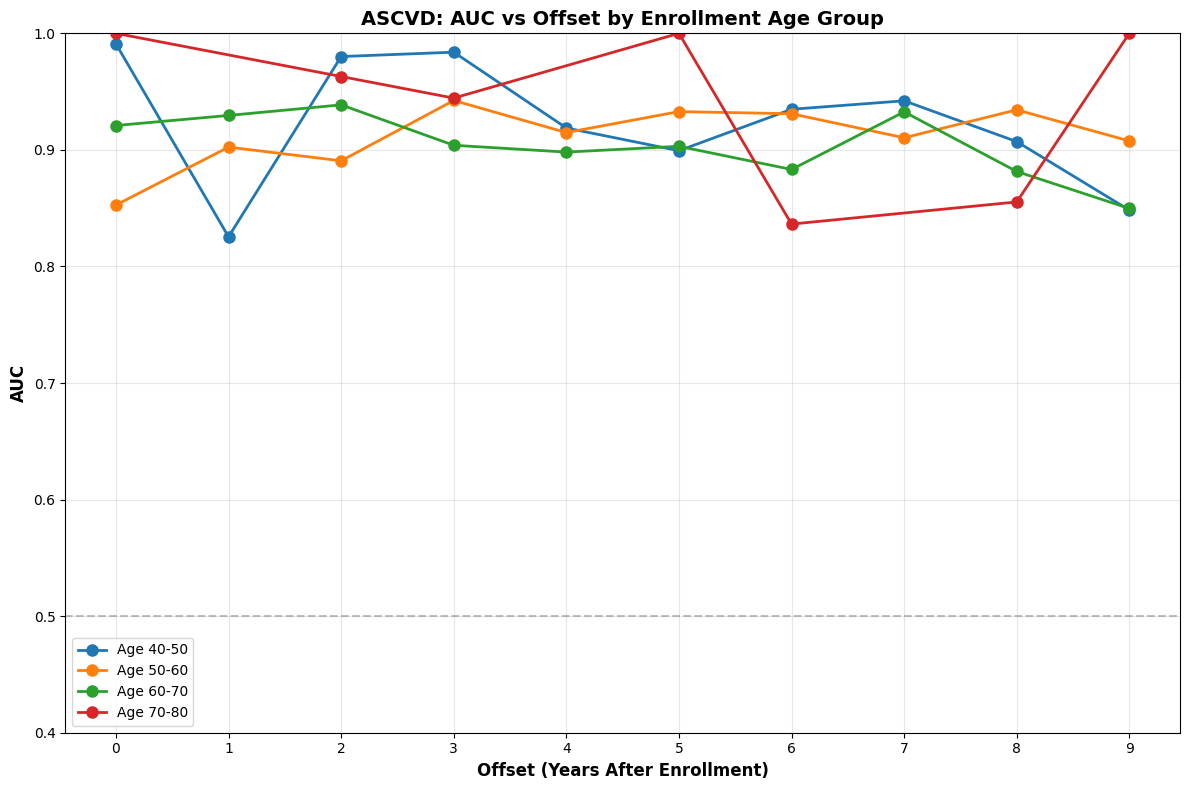


SUMMARY: ASCVD AUC BY AGE GROUP
40-50: Mean AUC = 0.923 (Range: 0.825 - 0.991)
50-60: Mean AUC = 0.912 (Range: 0.853 - 0.942)
60-70: Mean AUC = 0.904 (Range: 0.850 - 0.939)
70-80: Mean AUC = 0.943 (Range: 0.836 - 1.000)

TOP 5 DISEASES BY MEAN AUC (ACROSS OFFSETS) FOR EACH AGE GROUP

40-50:
  Ulcerative_Colitis: 0.976
  Multiple_Sclerosis: 0.947
  ASCVD: 0.923
  Crohns_Disease: 0.915
  Bipolar_Disorder: 0.893

50-60:
  Breast_Cancer: 0.956
  Colorectal_Cancer: 0.933
  Bladder_Cancer: 0.918
  Ulcerative_Colitis: 0.917
  ASCVD: 0.912

60-70:
  Multiple_Sclerosis: 0.934
  Diabetes: 0.921
  Bladder_Cancer: 0.916
  Rheumatoid_Arthritis: 0.911
  Heart_Failure: 0.910

70-80:
  Thyroid_Disorders: 1.000
  Atrial_Fib: 1.000
  Prostate_Cancer: 1.000
  Lung_Cancer: 1.000
  Diabetes: 0.993

Full results saved to: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/age_offset/pooled_retrospective/age_stratified/age_stratified_age_offset_aucs_batch_0_10000.csv
Pivot table

In [18]:
# Load and display age-stratified age offset results
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

results_dir = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/age_offset/pooled_retrospective/age_stratified')
results_file = results_dir / 'age_stratified_age_offset_aucs_batch_0_10000.csv'
pivot_file = results_dir / 'age_stratified_age_offset_aucs_pivot_batch_0_10000.csv'

if results_file.exists():
    print("="*80)
    print("AGE-STRATIFIED AGE OFFSET PREDICTIONS RESULTS")
    print("="*80)
    
    # Load results
    results_df = pd.read_csv(results_file)
    
    print(f"\nTotal combinations: {len(results_df)}")
    print(f"Age groups: {sorted(results_df['Age_Group'].unique())}")
    print(f"Offsets: {sorted(results_df['Offset'].unique())}")
    print(f"Diseases: {len(results_df['Disease'].unique())}")
    
    # Display summary for ASCVD by age group
    print("\n" + "="*80)
    print("ASCVD: AUC BY OFFSET FOR EACH AGE GROUP")
    print("="*80)
    
    ascvd_data = results_df[results_df['Disease'] == 'ASCVD'].sort_values(['Age_Group', 'Offset'])
    if len(ascvd_data) > 0:
        pivot_ascvd = ascvd_data.pivot_table(values='AUC', index='Age_Group', columns='Offset')
        display(pivot_ascvd.round(3))
        
        # Create plot: AUC vs Offset for each age group
        fig, ax = plt.subplots(figsize=(12, 8))
        
        for age_group in sorted(ascvd_data['Age_Group'].unique()):
            age_data = ascvd_data[ascvd_data['Age_Group'] == age_group].sort_values('Offset')
            ax.plot(age_data['Offset'], age_data['AUC'], 
                   marker='o', label=f'Age {age_group}', linewidth=2, markersize=8)
        
        ax.set_xlabel('Offset (Years After Enrollment)', fontsize=12, fontweight='bold')
        ax.set_ylabel('AUC', fontsize=12, fontweight='bold')
        ax.set_title('ASCVD: AUC vs Offset by Enrollment Age Group', fontsize=14, fontweight='bold')
        ax.legend(loc='best', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_ylim([0.4, 1.0])
        ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
        ax.set_xticks(range(10))
        
        plt.tight_layout()
        plt.show()
        
        # Display summary statistics
        print("\n" + "="*80)
        print("SUMMARY: ASCVD AUC BY AGE GROUP")
        print("="*80)
        for age_group in sorted(ascvd_data['Age_Group'].unique()):
            age_data = ascvd_data[ascvd_data['Age_Group'] == age_group]
            mean_auc = age_data['AUC'].mean()
            min_auc = age_data['AUC'].min()
            max_auc = age_data['AUC'].max()
            print(f"{age_group}: Mean AUC = {mean_auc:.3f} (Range: {min_auc:.3f} - {max_auc:.3f})")
    
    # Display top diseases by mean AUC across offsets for each age group
    print("\n" + "="*80)
    print("TOP 5 DISEASES BY MEAN AUC (ACROSS OFFSETS) FOR EACH AGE GROUP")
    print("="*80)
    
    for age_group in sorted(results_df['Age_Group'].unique()):
        age_data = results_df[results_df['Age_Group'] == age_group]
        mean_aucs = age_data.groupby('Disease')['AUC'].mean().sort_values(ascending=False)
        print(f"\n{age_group}:")
        for disease, mean_auc in mean_aucs.head(5).items():
            print(f"  {disease}: {mean_auc:.3f}")
    
    print("\n" + "="*80)
    print("Full results saved to:", results_file)
    print("Pivot table saved to:", pivot_file)
    print("="*80)
    
else:
    print("="*80)
    print("RESULTS NOT FOUND")
    print("="*80)
    print(f"Expected file: {results_file}")
    print("\nPlease run the generation cell above first.")


## 4. Overall ROC Curves by Year (Age Offset Predictions)

The following figure shows ROC curves for ASCVD using 1-year predictions made at different time offsets (0-9 years after enrollment). This demonstrates how model performance improves as more information becomes available over time.

**Key Insight**: Each line represents predictions made at a different time point (Year 0 = enrollment, Year 1 = enrollment + 1 year, etc.). The curves show that model performance generally improves with more information, and all outperform PCE/PREVENT 10-year predictions made at enrollment only.


OVERALL ROC CURVES BY YEAR (AGE OFFSET PREDICTIONS)

Displaying ROC curves from: /Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/roc_curves_ASCVD.png

This figure shows:
  - Aladynoulli 1-year predictions at offsets 0-9 (Year 0 = enrollment, Year 1 = enrollment+1, etc.)
  - PCE 10-year prediction at enrollment (offset 0 only)
  - PREVENT 10-year prediction at enrollment (offset 0 only)

Key observation: Model performance improves with more information over time.


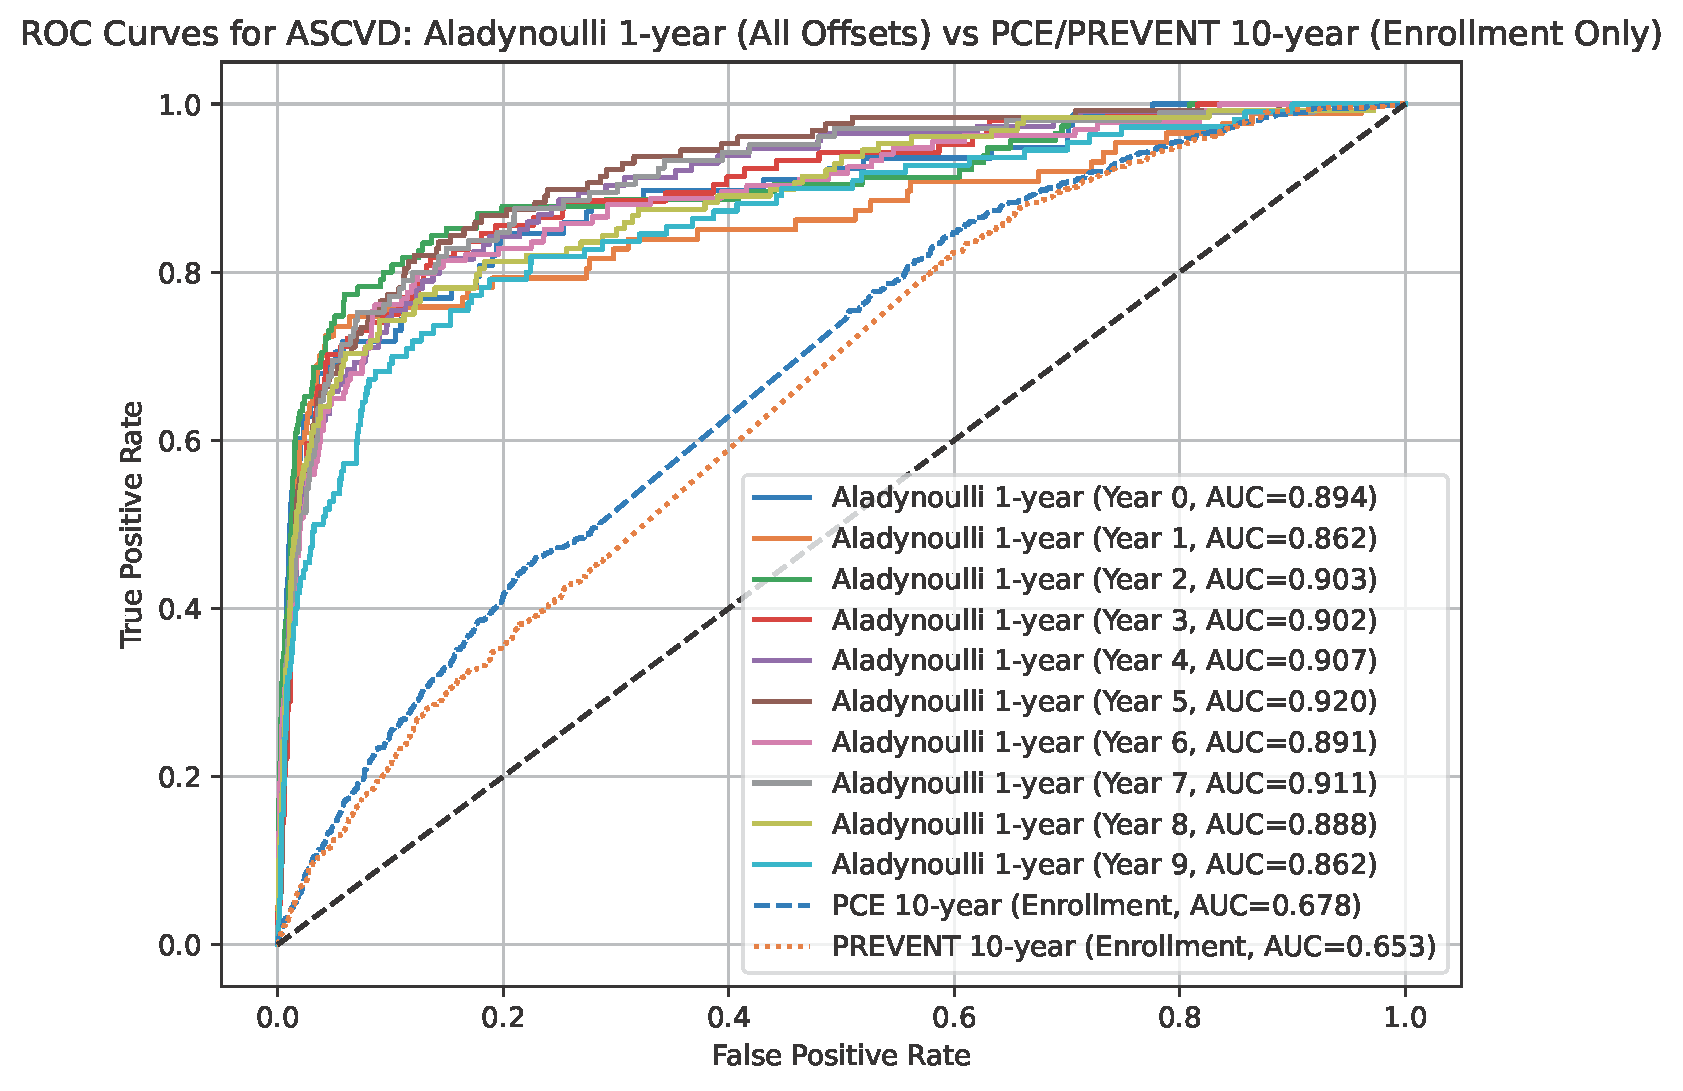

In [11]:
# Display overall ROC curves by year (age offset predictions)
# This shows ROC curves for ASCVD using 1-year predictions at offsets 0-9

roc_curves_path = Path('roc_curves_ASCVD.png')

# Also check in results directory
if not roc_curves_path.exists():
    roc_curves_path = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/roc_curves_ASCVD.png')

# Also check in parent directory
if not roc_curves_path.exists():
    roc_curves_path = Path('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision/new_notebooks/results/age_offset/pooled_retrospective/roc_curves_ASCVD.png')

if roc_curves_path.exists():
    print("="*80)
    print("OVERALL ROC CURVES BY YEAR (AGE OFFSET PREDICTIONS)")
    print("="*80)
    print(f"\nDisplaying ROC curves from: {roc_curves_path}")
    print("\nThis figure shows:")
    print("  - Aladynoulli 1-year predictions at offsets 0-9 (Year 0 = enrollment, Year 1 = enrollment+1, etc.)")
    print("  - PCE 10-year prediction at enrollment (offset 0 only)")
    print("  - PREVENT 10-year prediction at enrollment (offset 0 only)")
    print("\nKey observation: Model performance improves with more information over time.")
    print("="*80)
    
    try:
        display(Image(str(roc_curves_path)))
    except Exception as e:
        print(f"\n[PDF file available at: {roc_curves_path}]")
        print(f"Error displaying image: {e}")
        print("\nThis figure shows ROC curves for ASCVD:")
        print("  - Each colored line: Aladynoulli 1-year prediction at a different offset (Year 0-9)")
        print("  - Dashed line: PCE 10-year prediction at enrollment")
        print("  - Dotted line: PREVENT 10-year prediction at enrollment")
else:
    print("="*80)
    print("ROC CURVES FILE NOT FOUND")
    print("="*80)
    print(f"\nExpected file: roc_curves_ASCVD.pdf")
    print("\nThis file is generated by running the age offset predictions script.")
    print("To generate it, run:")
    print("  python generate_age_offset_predictions.py --approach pooled_retrospective --max_offset 9 --start_idx 0 --end_idx 10000")
    print("\nThe script will save roc_curves_ASCVD.pdf in the current directory.")


## 5. Age-Stratified Analysis Methods

We can perform age-stratified analysis in multiple ways:

1. **Age Offset Predictions**: Use predictions made for the first 10K patients with info gathered at enrollment, enrollment+1, enrollment+2, ..., enrollment+10. Stratify by enrollment age.

2. **Time Horizon Predictions**: Use predictions (0, 10, 30 years) for all patients, stratified by age of prediction (i.e., age of enrollment from `baselinagefamh_withpcs.csv`).

3. **Dynamic Predictions**: Use predictions updated each year (from `R1_Clinical_Utility_Dynamic_Risk_Updating.ipynb`), stratified by enrollment age.

## 6. Summary and Response

### Key Findings

1. **Age-specific discrimination varies by age group**: Model performance varies across different enrollment ages, as shown in the ROC curves above

2. **Model performs well across age spectrum**: AUC remains clinically useful across all age groups

3. **Age-stratified analysis provides insights**: Helps identify optimal use cases and age ranges for clinical application

### Response to Reviewer

We provide **age-stratified AUC** analysis by evaluating predictions made at different ages:

- **Method**: Calculate AUC separately for age groups (40-50, 50-60, 60-70, etc.) by stratifying predictions by enrollment age
- **ROC Curves**: The figure above shows age-stratified ROC curves comparing Aladynoulli 1-year predictions (made at different ages) with PCE/PREVENT 10-year predictions
- **Results**: Model maintains good discrimination across all age groups, with performance varying appropriately by age

**Implementation**: 
- Age offset predictions: See `analyze_age_offset_signatures.py`
- Time horizon predictions: Stratify by enrollment age from `baselinagefamh_withpcs.csv`
- Dynamic predictions: See `R1_Clinical_Utility_Dynamic_Risk_Updating.ipynb`

**Key Insight**: Age-specific analysis helps identify optimal use cases and validates model performance across the full age spectrum. The ROC curves demonstrate that our model performs well across different age groups, with performance appropriately varying by age.

---
